# Data Management and Visualization, assignment 4: Creating Graphs

## Dataset
I am using the bike sharing dataset of https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset, which provides data on how many bikes are rent out on specific hours of specific days, the weather on these days, whether the day was a weekday or not, etc. I would like to be able to predict the number of bikes rented out, given some information on a specific day and/or time (e.g. the weather conditions, which day/time it is, whether it is a weekday/holiday, etc.).

## Loading data

In [16]:
%matplotlib inline
import pandas
data = pandas.read_csv('hour.csv', low_memory=False)
print("Number of observations: ",len(data))
data.head()

Number of observations:  17379


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Data management

In [17]:
data['month_no'] = data['yr']*12+data['mnth']

In [18]:
seasmap = {1: '1. Winter', 2:'2. Spring', 3:'3. Summer', 4:'4. Fall'}
data['season'] = data['season'].map(seasmap)
sub = data[['season','month_no', 'mnth', 'hr','weekday', 'workingday', 'weathersit','temp','hum', 'windspeed','cnt']]
sub = sub.copy()

## Univariate Graphs

I'm skippingg the graphs for season, monthno, month, day of the week and hour, since I've already shown in the data management assignments that these are uniformally distributed and that measurements are available for all these time moments.

### workingday

count     17379
unique        2
top           1
freq      11865
Name: workingday, dtype: int64

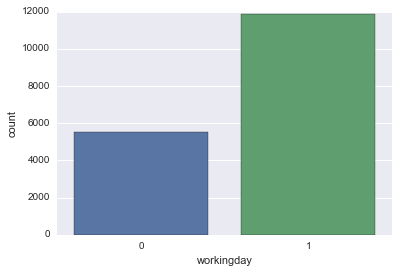

In [31]:
import seaborn
import matplotlib.pyplot as plt
sub['workingday'] = sub['workingday'].astype('category')
seaborn.countplot(x='workingday', data=sub);
sub.workingday.describe()

### weather situation

count     17379
unique        4
top           1
freq      11413
Name: weathersit, dtype: int64

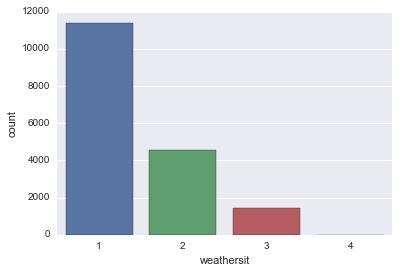

In [32]:
sub['weathersit'] = sub['weathersit'].astype('category')
seaborn.countplot(x='weathersit', data=sub);
sub.weathersit.describe()

### temperature

count    17379.000000
mean         0.496987
std          0.192556
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

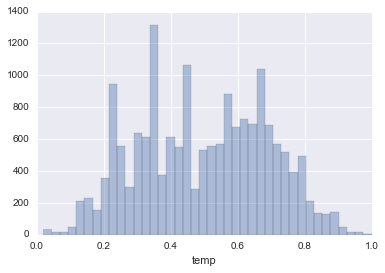

In [33]:
seaborn.distplot(data['temp'],kde=False);
sub.temp.describe()

### humididty

count    17379.000000
mean         0.627229
std          0.192930
min          0.000000
25%          0.480000
50%          0.630000
75%          0.780000
max          1.000000
Name: hum, dtype: float64

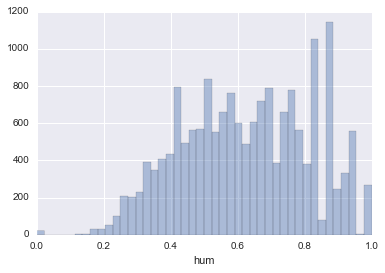

In [34]:
seaborn.distplot(data['hum'],kde=False);
sub.hum.describe()

### windspeed

count    17379.000000
mean         0.190098
std          0.122340
min          0.000000
25%          0.104500
50%          0.194000
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64

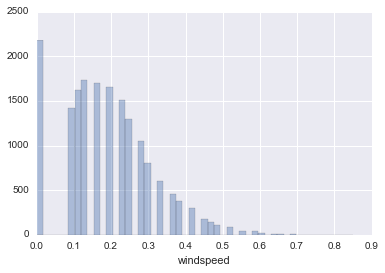

In [35]:
seaborn.distplot(data['windspeed'],kde=False);
sub.windspeed.describe()

### number of bikes rented

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

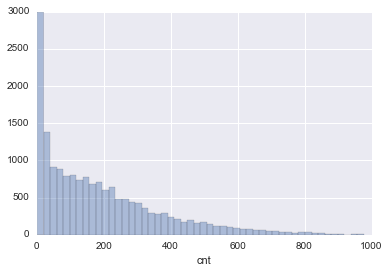

In [36]:
seaborn.distplot(data['cnt'],kde=False);
sub.cnt.describe()

## Bivariate graphs

### Season

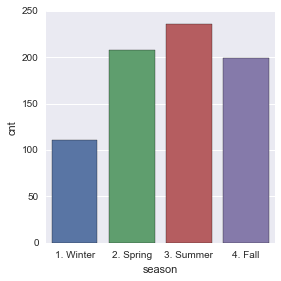

In [42]:
seaborn.factorplot(x='season', y='cnt',data=data, kind='bar', ci=None);

### month number

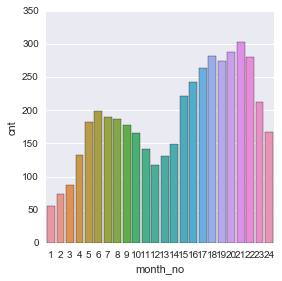

In [45]:
seaborn.factorplot(x='month_no', y='cnt',data=data, kind='bar', ci=None);

### month

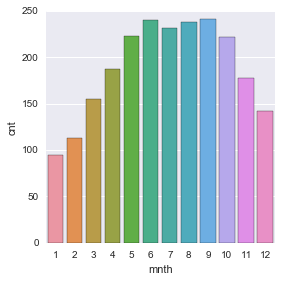

In [54]:
seaborn.factorplot(x='mnth', y='cnt',data=data, kind='bar', ci=None);

### hour

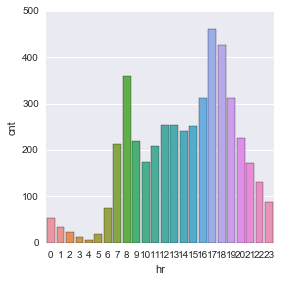

In [49]:
seaborn.factorplot(x='hr', y='cnt',data=data, kind='bar', ci=None);

### weekday

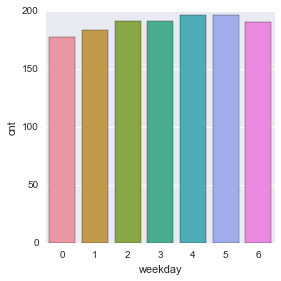

In [51]:
seaborn.factorplot(x='weekday', y='cnt',data=data, kind='bar', ci=None);

### workingday

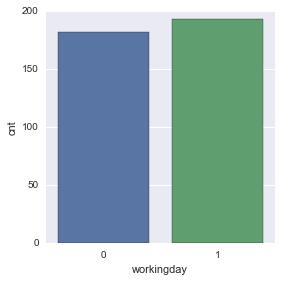

In [52]:
seaborn.factorplot(x='workingday', y='cnt',data=data, kind='bar', ci=None);

### weathersituation

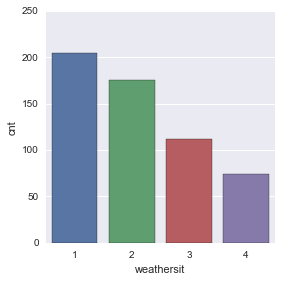

In [53]:
seaborn.factorplot(x='weathersit', y='cnt',data=data, kind='bar', ci=None);

### temperature


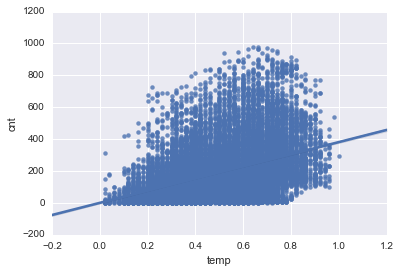

In [58]:
seaborn.regplot(x='temp',y='cnt',data=data);

### humidity

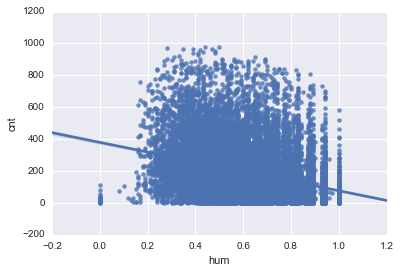

In [59]:
seaborn.regplot(x='hum',y='cnt',data=data);

### windspeed

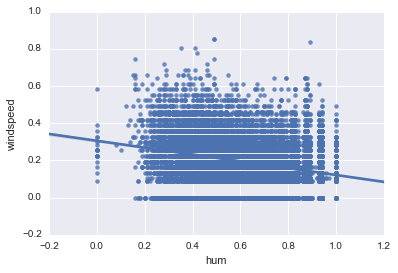

In [60]:
seaborn.regplot(x='hum',y='windspeed',data=data);